Loading data...
Data loaded.
Training Teacher Model
Epoch: 20/200..  Training loss: 7239.37012..  Reg Proj: 0.00000..  Reg Latent: 0.18771..  Memory: 7237.49316..  Cost: 7239.37012.. 
Epoch: 40/200..  Training loss: 12261.52637..  Reg Proj: 0.00000..  Reg Latent: 1.51971..  Memory: 12246.32910..  Cost: 12261.52637.. 
Epoch: 60/200..  Training loss: 7307.65625..  Reg Proj: 0.00000..  Reg Latent: 0.46636..  Memory: 7302.99268..  Cost: 7307.65625.. 
Epoch: 80/200..  Training loss: 7591.74561..  Reg Proj: 0.00000..  Reg Latent: 0.99037..  Memory: 7581.84180..  Cost: 7591.74561.. 
Epoch: 100/200..  Training loss: 7859.94238..  Reg Proj: 0.00000..  Reg Latent: 2.10455..  Memory: 7838.89697..  Cost: 7859.94238.. 
Epoch: 120/200..  Training loss: 8132.48389..  Reg Proj: 0.00000..  Reg Latent: 0.98452..  Memory: 8122.63867..  Cost: 8132.48389.. 
Epoch: 140/200..  Training loss: 8003.79150..  Reg Proj: 0.00000..  Reg Latent: 0.15128..  Memory: 8002.27881..  Cost: 8003.79150.. 
Epoch: 160/200..  

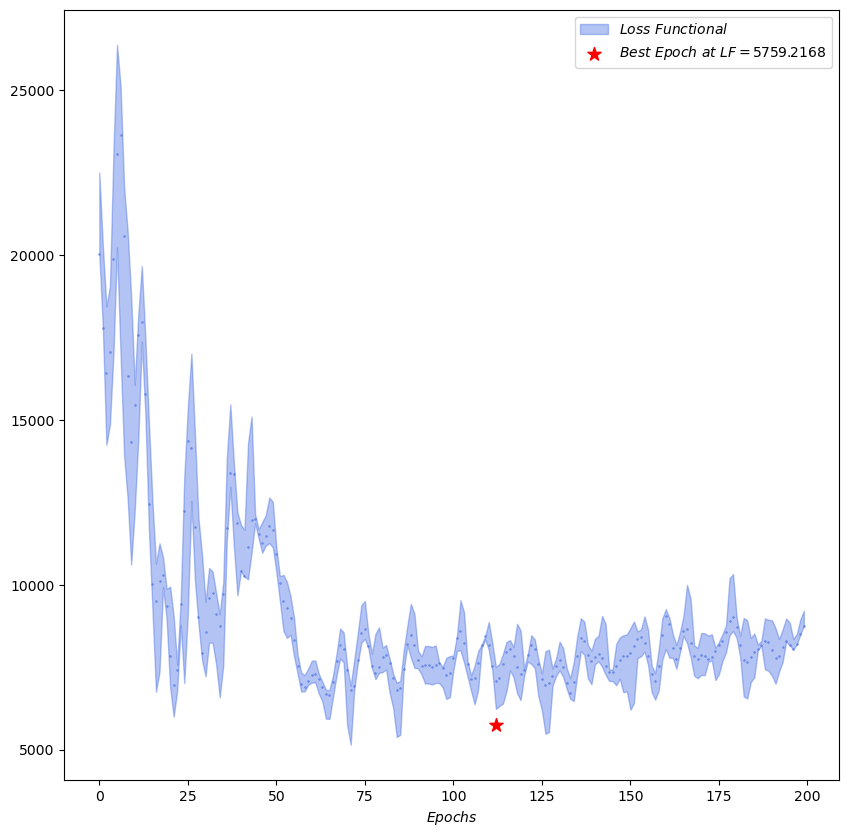

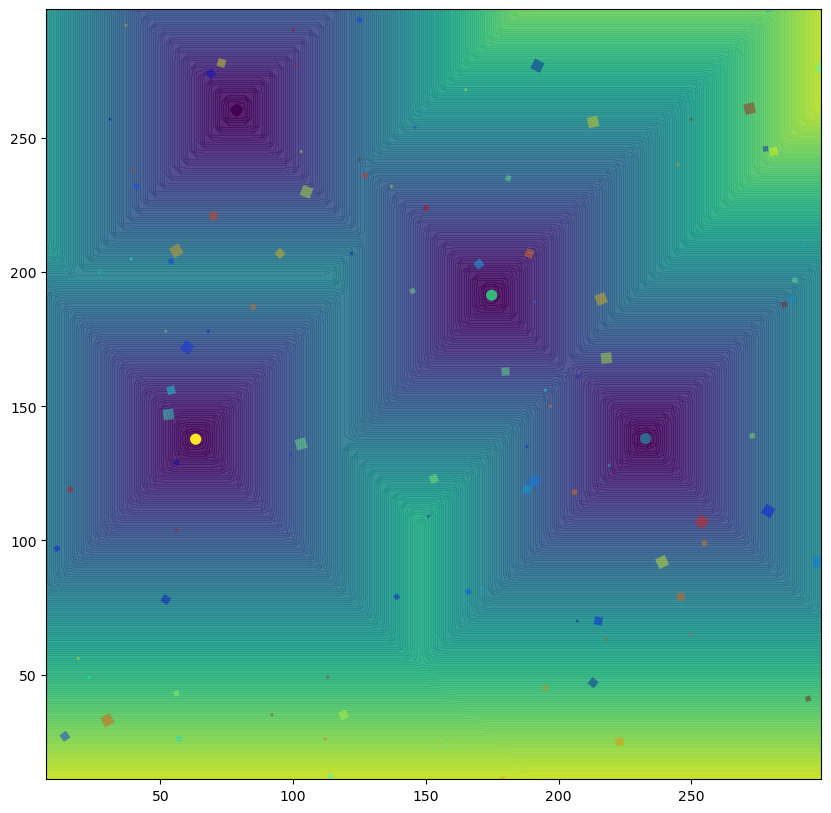

Processing...
flag is 5468
m is 4533
i is 10000


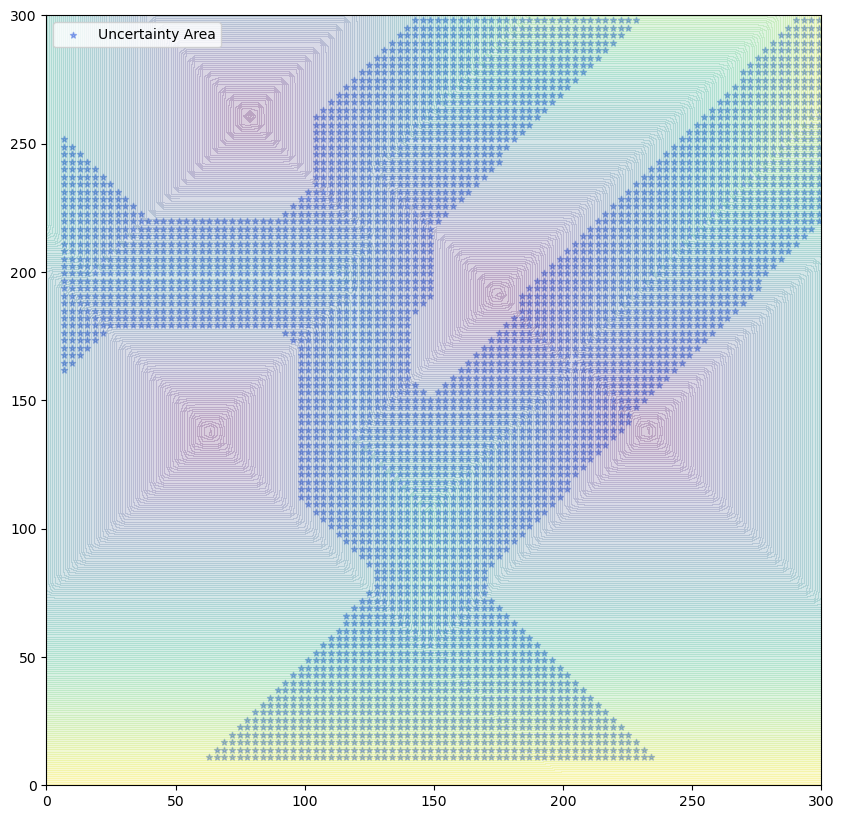

Labeled 0/4533 points.
Labeled 1000/4533 points.
Labeled 2000/4533 points.
Labeled 3000/4533 points.
Labeled 4000/4533 points.
Labeled all 4533/4533 points.


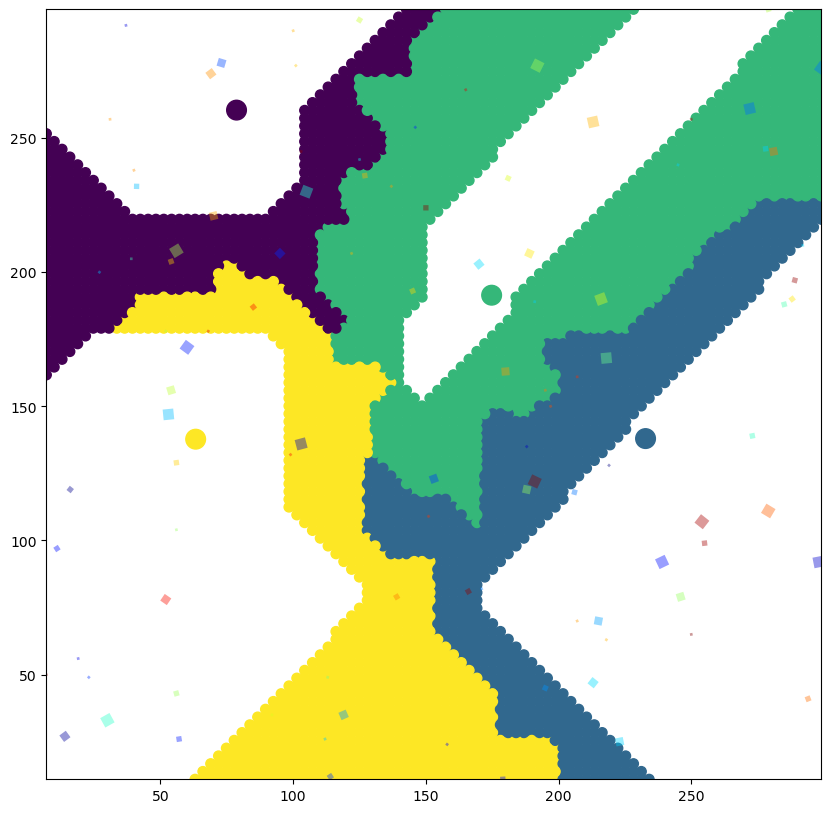

Training Student Model
Acc:  0.24487094639311713
Epoch:  0 Cost:  2379.2041015625
Acc:  0.9320538274873152
Epoch:  2000 Cost:  21.475053787231445
Acc:  0.9450694904037061
Epoch:  4000 Cost:  16.55757713317871
Acc:  0.9276417383631149
Epoch:  6000 Cost:  16.43108367919922
Acc:  0.9463931171409663
Epoch:  8000 Cost:  14.07286262512207
Acc:  0.9358041032428855
Epoch:  10000 Cost:  14.215299606323242
Acc:  0.9320538274873152
Epoch:  12000 Cost:  14.307658195495605
Acc:  0.9272005294506949
Epoch:  14000 Cost:  15.103028297424316
Acc:  0.9324950363997353
Epoch:  16000 Cost:  14.029245376586914
Acc:  0.9521288330024267
Epoch:  18000 Cost:  11.4772310256958
Acc:  0.9466137215971763
Epoch:  20000 Cost:  11.420449256896973
Acc:  0.956540922126627
Epoch:  22000 Cost:  10.677299499511719
Acc:  0.9583057577763071
Epoch:  24000 Cost:  10.459331512451172
Acc:  0.9585263622325171
Epoch:  26000 Cost:  10.557829856872559
Acc:  0.9589675711449371
Epoch:  28000 Cost:  10.214592933654785


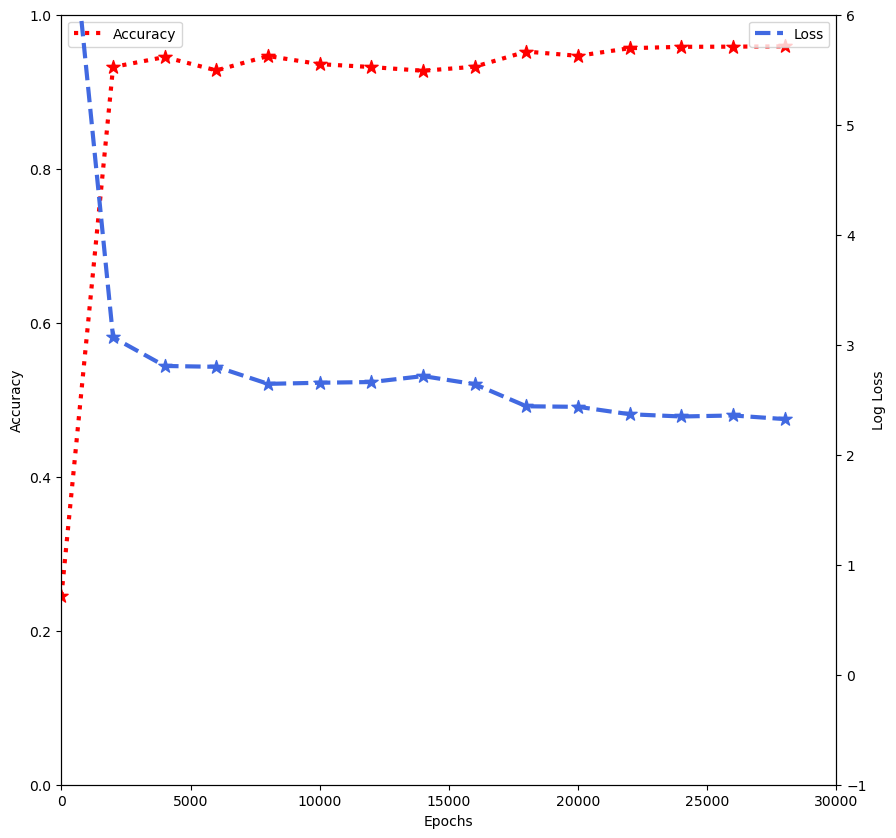

In [1]:
import torch
from src.quadtree import QuadTree
from src.utils.data import loadData

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data, _ = loadData(100)

learning_rate = 1e-2
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 200,
    "times": 10,
    "train_data": torch.from_numpy(data).float().to(device),
    "alpha": 5,
    "beta": 10
}
un_args = {
    "N": 100,
    "M": 10000 - 1,
    "epsilon": 0.15
}
student_args = {
    "optimizer_lr": 1e-3,
    "epochs": 30000,
}

quadtree = QuadTree(10, data, teacher_args, un_args, student_args)
quadtree.root.create_student(plot=True)